The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [38]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np


In [39]:
#loading the dataset
nobel = pd.read_csv("data/nobel.csv")

In [40]:
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [41]:
#Most common gender
nobel["sex"].value_counts()

Male      905
Female     65
Name: sex, dtype: int64

In [42]:
#Nobels per country
nobel["birth_country"].value_counts()

United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 129, dtype: int64

In [43]:
# Store and display the most commonly awarded gender and birth country in requested variables
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]

print("\n The gender with the most Nobel laureates is :", top_gender)
print(" The most common birth country of Nobel laureates is :", top_country)



 The gender with the most Nobel laureates is : Male
 The most common birth country of Nobel laureates is : United States of America


In [44]:
#US Born winners
nobel["US_born"] = nobel["birth_country"] == "United States of America"
#Decade column
nobel["decade"] = (np.floor(nobel["year"]/10) * 10).astype(int)

In [45]:
prop_usa_winners = nobel.groupby("decade", as_index = False)["US_born"].mean()

prop_usa_winners

,decade,US_born
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


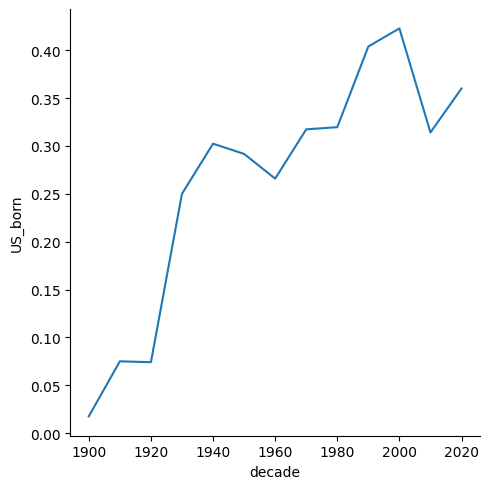

In [46]:
#Plotting USA born winners
sns.relplot(x='decade', y='US_born', data=prop_usa_winners, kind="line")

In [47]:
#The decade with the max proportions of US born winners
max_decade_usa = prop_usa_winners[prop_usa_winners["US_born"] == prop_usa_winners["US_born"].max()]["decade"].values[0]
max_decade_usa

2000

In [48]:
#Female winners prop
nobel["female_winners"] = nobel["sex"] == "Female"

In [49]:
#Group by decate and category
nobel_female_winners = nobel.groupby(["decade", "category"], as_index = False)["female_winners"].mean()

In [50]:
#Finding the decade and category with more female winners

max_female_winners = nobel_female_winners[nobel_female_winners["female_winners"] == nobel_female_winners["female_winners"].max()][["decade", "category"]]
max_female_winners



,decade,category
68,2020,Literature


In [51]:
# Create a dictionary with the decade and category pair
max_female_dict = {max_female_winners['decade'].values[0]: max_female_winners['category'].values[0]}


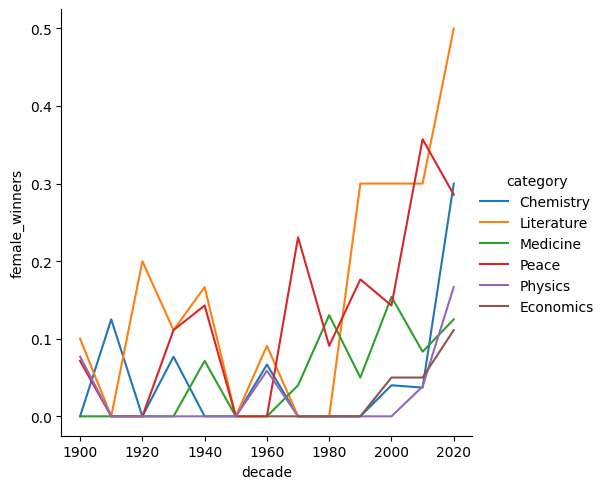

In [52]:
#Ploting the decade / category for female winners
sns.relplot(x='decade', y='female_winners', data=nobel_female_winners, hue = "category",kind="line")

In [53]:
#Filtering female winners
nobel_females = nobel[nobel["female_winners"]]
#Finding the minimum value
min_row = nobel_females[nobel_females["year"] == nobel_females["year"].min()]


first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
first_woman_year = min_row["year"].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}, on the year {first_woman_year}.")



 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics, on the year 1903.


In [54]:
#Counting the laurates by prizes
count_names = nobel["full_name"].value_counts()

#laurates with more than 1 prize
repeats = count_names[count_names > 1].index 

#list of repeats laurates
repeat_list = list(repeats)

In [55]:
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']

<AxesSubplot: xlabel='category', ylabel='count'>

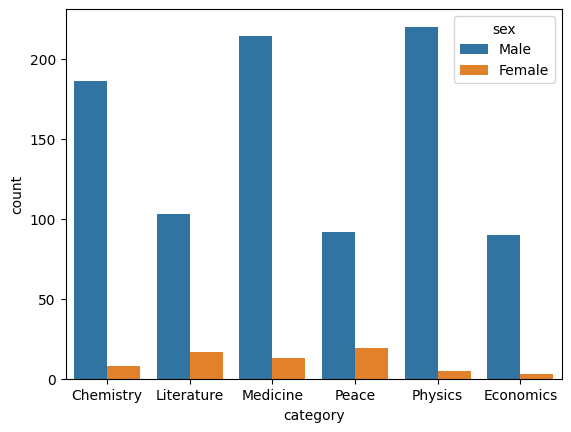

In [61]:
#Plot of winners by category and gender.
sns.countplot(x = "category", data = nobel,  hue = "sex")

In [69]:
#Looking for the category with more % of female winners.
nobel_women_category = nobel.groupby("category", as_index = False)["female_winners"].mean()

nobel_women_category.sort_values(by = "female_winners", ascending = False)

,category,female_winners
2,Literature,0.141667
4,Peace,0.134752
3,Medicine,0.057269
0,Chemistry,0.041237
1,Economics,0.032258
5,Physics,0.022222
